In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import base64
import pdb
import numpy as np
#Importing necessary libraries

In [ ]:
df_train = pd.read_json('test.json')

In [ ]:
df_train.head()

In [140]:
plt.style.use('ggplot') #importing plotting system

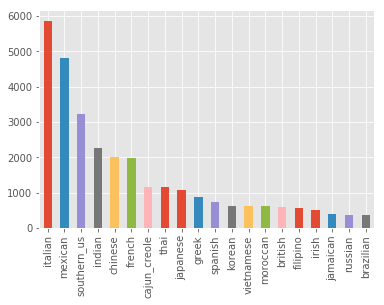

In [141]:
df_train['cuisine'].value_counts().plot(kind='bar')

In [142]:
from collections import Counter

In [143]:
counters = {}
for cuisine in df_train['cuisine'].unique():
    counters[cuisine] = Counter()
    indices = (df_train['cuisine'] == cuisine)              #Counting the amount of each ingredient
    for ingredients in df_train[indices]['ingredients']:
        counters[cuisine].update(ingredients)

In [144]:
counters['italian'].most_common(10)    #posting above results for Italian cuisine

[('salt', 2575),
 ('olive oil', 2306),
 ('garlic cloves', 1204),
 ('grated parmesan cheese', 1176),
 ('garlic', 1100),
 ('ground black pepper', 1052),
 ('extra-virgin olive oil', 1044),
 ('onions', 921),
 ('water', 798),
 ('butter', 772)]

In [116]:
Top_10 = pd.DataFrame([[items[0] for items in counters[cuisine].most_common(10)] for cuisine in counters],
                     index = [cuisine for cuisine in counters],
                     columns = ['top{}'.format(i) for i in range(1,11)])    #Converting info into Top 10 most common cuisines
Top_10

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
italian,salt,olive oil,garlic cloves,grated parmesan cheese,garlic,ground black pepper,extra-virgin olive oil,onions,water,butter
greek,salt,olive oil,dried oregano,feta cheese crumbles,garlic cloves,fresh lemon juice,garlic,ground black pepper,extra-virgin olive oil,pepper
southern_us,salt,butter,all-purpose flour,sugar,large eggs,baking powder,water,unsalted butter,milk,buttermilk
french,salt,sugar,all-purpose flour,unsalted butter,butter,olive oil,large eggs,water,garlic cloves,ground black pepper
mexican,salt,onions,garlic,ground cumin,olive oil,chili powder,jalapeno chilies,sour cream,avocado,corn tortillas
moroccan,olive oil,salt,ground cumin,onions,ground cinnamon,garlic cloves,ground ginger,water,carrots,paprika
russian,salt,sugar,onions,all-purpose flour,sour cream,eggs,water,butter,unsalted butter,large eggs
indian,salt,onions,garam masala,water,ground turmeric,garlic,ground cumin,cumin seed,vegetable oil,oil
japanese,soy sauce,salt,sugar,mirin,water,sake,rice vinegar,vegetable oil,scallions,sesame oil
vietnamese,fish sauce,sugar,salt,garlic,water,carrots,soy sauce,garlic cloves,vegetable oil,shallots


In [117]:
df_train['ingredient'] = df_train['ingredients'].map(";".join)
df_train.head()                 #Mapping Ingredients

,cuisine,id,ingredients,ingredient
0,italian,0,"[penne, shallots, rice vinegar, fresh basil, g...",penne;shallots;rice vinegar;fresh basil;ground...
1,greek,1,"[sugar, chopped walnuts, filo dough, chopped a...",sugar;chopped walnuts;filo dough;chopped almon...
2,italian,2,"[fresh rosemary, chopped fresh thyme, fresh or...",fresh rosemary;chopped fresh thyme;fresh orega...
3,southern_us,3,"[sugar, hot sauce, ramps, vinegar, cream chees...",sugar;hot sauce;ramps;vinegar;cream cheese;gro...
4,french,4,"[ground cinnamon, panettone, whipped cream, Am...",ground cinnamon;panettone;whipped cream;Amaren...


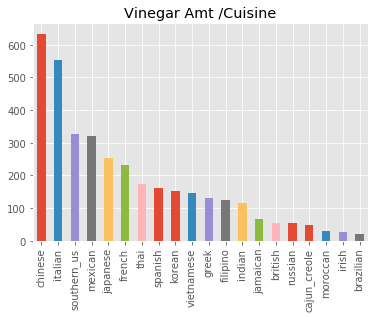

In [118]:
indices = df_train['ingredient'].str.contains('vinegar')
df_train[indices]['cuisine'].value_counts().plot(kind='bar', title='Vinegar Amt /Cuisine')

#Counting the amount of vinegar in each cuisine for example

In [119]:
df_train['ingredient'].str.contains('vinegar')   #Which on contains vinegar in True/False Relationship

0         True
1        False
2        False
3         True
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18        True
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26        True
27       False
28       False
29       False
         ...  
29744    False
29745    False
29746    False
29747    False
29748     True
29749    False
29750    False
29751     True
29752     True
29753    False
29754    False
29755    False
29756    False
29757     True
29758    False
29759    False
29760     True
29761    False
29762     True
29763    False
29764    False
29765    False
29766    False
29767    False
29768    False
29769    False
29770    False
29771    False
29772    False
29773    False
Name: ingredient, Length: 29774, dtype: bool

In [120]:
unique_items = np.unique(Top_10.values.ravel())
unique_items                                       #Noticing unqiue values in Top_10

array(['all-purpose flour', 'avocado', 'baking powder', 'baking soda',
       'black pepper', 'butter', 'buttermilk', 'cachaca',
       'cajun seasoning', 'carrots', 'cayenne pepper', 'chili powder',
       'coconut milk', 'corn starch', 'corn tortillas', 'cumin seed',
       'dried oregano', 'dried thyme', 'eggs', 'extra-virgin olive oil',
       'feta cheese crumbles', 'fish sauce', 'fresh lemon juice',
       'garam masala', 'garlic', 'garlic cloves',
       'grated parmesan cheese', 'green bell pepper', 'green onions',
       'ground allspice', 'ground black pepper', 'ground cinnamon',
       'ground cumin', 'ground ginger', 'ground turmeric',
       'jalapeno chilies', 'large eggs', 'lime', 'milk', 'mirin', 'oil',
       'olive oil', 'onions', 'paprika', 'pepper', 'potatoes',
       'red bell pepper', 'rice vinegar', 'sake', 'salt', 'scallions',
       'sesame oil', 'sesame seeds', 'shallots', 'sour cream',
       'soy sauce', 'sugar', 'tomatoes', 'unsalted butter',
       'vegeta

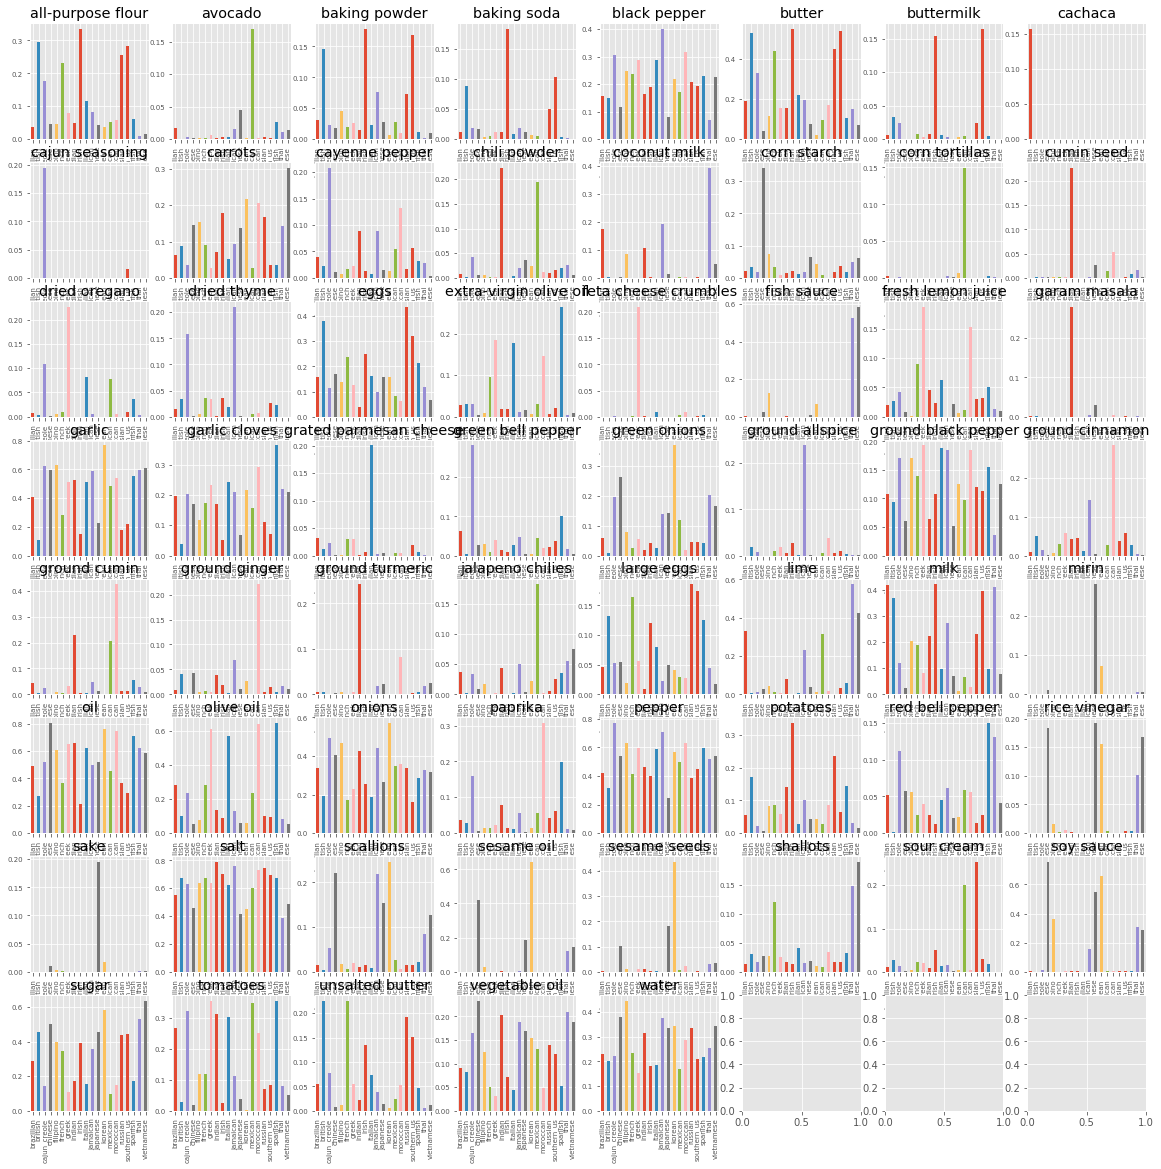

In [121]:
fig, axes = plt.subplots(8, 8, figsize=(20,20))
for ingredient, ax_index in zip(unique, range(64)):               #Creating 8X8 grid of unique ingredients in the Top 10 list
    indices = df_train['ingredient'].str.contains(ingredient)     # Displaying ingredient occurance from each Country
    relative_freq = (df_train[indices]['cuisine'].value_counts() / df_train['cuisine'].value_counts())
    
    relative_freq.plot(kind='bar', ax=axes.ravel()[ax_index], fontsize=7, title=ingredient)

In [122]:
from sklearn.feature_extraction.text import CountVectorizer
CV = CountVectorizer()
X = CV.fit_transform(df_train['ingredient'].values)

In [123]:
print(list(CV.vocabulary_.keys())[:100])


['penne', 'shallots', 'rice', 'vinegar', 'fresh', 'basil', 'ground', 'black', 'pepper', 'extra', 'virgin', 'olive', 'oil', 'ripe', 'olives', 'fat', 'free', 'less', 'sodium', 'chicken', 'broth', 'asiago', 'garlic', 'cloves', 'spinach', 'cooking', 'spray', 'salt', 'shiitake', 'mushroom', 'caps', 'sugar', 'chopped', 'walnuts', 'filo', 'dough', 'almonds', 'unsalted', 'butter', 'cinnamon', 'whole', 'rosemary', 'thyme', 'oregano', 'parmigiano', 'reggiano', 'cheese', 'eggplant', 'cracked', 'flat', 'leaf', 'parsley', 'baguette', 'sea', 'hot', 'sauce', 'ramps', 'cream', 'white', 'kosher', 'cayenne', 'smoked', 'paprika', 'mayonaise', 'pimentos', 'sharp', 'cheddar', 'panettone', 'whipped', 'amarena', 'cherries', 'milk', 'cointreau', 'liqueur', 'eggs', 'orange', 'juice', 'jalapeno', 'chilies', 'purple', 'onion', 'canola', 'tomatoes', 'lime', 'shredded', 'lettuce', 'sour', 'guacamole', 'frozen', 'corn', 'beans', 'quinoa', 'cilantro', 'water', 'freshly', 'grits', 'green', 'chile', 'onions', 'powder'

In [124]:
X.shape

(29774, 2868)

In [125]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
Y = LE.fit_transform(df_train.cuisine)
Y[:200]

array([ 9,  6,  9, 16,  5, 13, 16, 13, 16, 14, 15, 13,  7, 16, 11,  7, 13,
        7, 13, 19, 17, 18, 14, 13,  7, 18,  6, 14,  7, 13,  1,  7, 18,  9,
       14, 16,  9, 13, 16, 19, 16, 11, 14, 16, 13,  9, 16,  5,  7, 16,  5,
        5,  7,  2,  5, 16, 19, 13,  9,  5,  9,  9, 17, 16,  9,  9, 18, 13,
        2,  1,  7, 19, 11, 17,  0, 13,  7, 13,  9, 12, 16, 18, 13,  8,  6,
        9,  2, 13,  7,  5,  9, 13, 16,  2, 16, 12,  9,  7,  5, 18,  5,  9,
       13, 16, 13,  7, 14, 16,  9,  9, 13,  9, 13, 11, 16, 13,  0, 13,  2,
        9,  1, 12, 13, 10, 13,  9,  9,  5,  2,  3, 13, 14,  0, 13,  9,  9,
        4,  8, 13, 11, 13,  6,  9,  9, 12,  5, 17,  0,  9, 19, 16, 18, 16,
        0, 13, 10, 16,  5,  9,  2, 13, 13,  7, 16,  9,  9,  9, 11, 19, 13,
       14,  4, 13, 14, 16, 14,  6, 16, 13,  9,  9, 14,  2,  1,  9, 17, 14,
       16,  9,  9, 18, 11,  5,  9, 13, 11, 19,  3,  9, 13])

In [126]:
LE.classes_

array(['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino',
       'french', 'greek', 'indian', 'irish', 'italian', 'jamaican',
       'japanese', 'korean', 'mexican', 'moroccan', 'russian',
       'southern_us', 'spanish', 'thai', 'vietnamese'], dtype=object)

In [127]:
from sklearn.model_selection import train_test_split    #Begin Training data with logistic regression using train_test_split
from sklearn.linear_model import LogisticRegression

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [129]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)


C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [130]:
logistic.score(X_test, y_test)

0.781360201511335

Text(0.5, 64.59999999999997, 'Origin Predicted')

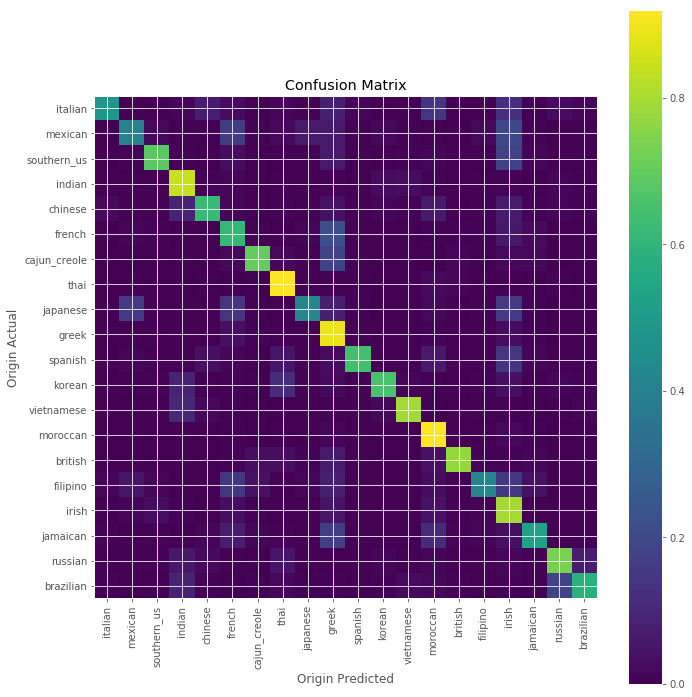

In [131]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10, 10))

CMatrix = confusion_matrix(y_test, logistic.predict(X_test))
CMatrix_normal = CMatrix.astype('float') / CMatrix.sum(axis=1)[:, np.newaxis]

plt.imshow(CMatrix_normal, interpolation='nearest')#Transforms the logistic prediction above into a matrix of Float data
plt.title("Confusion Matrix")                   #type, showing the relationship between our predictions and the actual data
plt.colorbar(shrink= 1)
cuisines = df_train['cuisine'].value_counts().index
ticks = np.arange(len(cuisines))
plt.xticks(ticks, cuisines, rotation=90)
plt.yticks(ticks, cuisines)
plt.tight_layout()
plt.ylabel('Origin Actual')
plt.xlabel('Origin Predicted')

In [ ]:
from sklearn.metrics import classification_report
y_pred = logistic.predict(X_test)          #Displaying the predicted data from our matrix
print(classification_report(y_test, y_pred, target_names=ingredients))